# LeNet

The LeNet architecture is a seminal work in the deep learning community, first introduced by
LeCun et al. in their 1998 paper, Gradient-Based Learning Applied to Document Recognition. As the name of the paper suggests, the authors’ motivation behind implementing LeNet was
primarily for Optical Character Recognition (OCR).

The LeNet architecture is straightforward and small (in terms of memory footprint), making it
perfect for teaching the basics of CNNs.

In this chapter, we’ll seek to replicate experiments similar to LeCun’s in their 1998 paper. We’ll
start by reviewing the LeNet architecture and then implement the network using Keras. Finally,
we’ll evaluate LeNet on the MNIST dataset for handwritten digit recognition.

## Import necessary librarires

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD

## Define the model architecture

In [2]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            
        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        
        # Second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [3]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 55MB download may take a minute)
print("[INFO] accessing MNIST...")
dataset = datasets.fetch_openml('mnist_784')
data = dataset.data

[INFO] accessing MNIST...


In [5]:
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    data = data.reshape(data.shape[0], 28, 28, 1)

In [6]:
data.shape

(70000, 28, 28, 1)

## Preprocess data and spilt into train/test

In [7]:
# scale the input data to the range [0, 1] and perform a train/test split
(trainX, testX, trainY, testY) = train_test_split(data / 255.0,
                                                  dataset.target.astype("int"), test_size=0.25, random_state=42)

# convert the labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

## Compile and train the network

In [8]:
# initialize the optimizer and model
print("[INFO] compiling model...") 
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=1)

[INFO] compiling model...
[INFO] training network...
Epoch 1/20
411/411 [==============================] - 35s 7ms/step - loss: 1.6613 - accuracy: 0.5047 - val_loss: 0.4552 - val_accuracy: 0.8404
Epoch 2/20
411/411 [==============================] - 2s 6ms/step - loss: 0.3089 - accuracy: 0.9061 - val_loss: 0.6462 - val_accuracy: 0.8463
Epoch 3/20
411/411 [==============================] - 2s 6ms/step - loss: 0.2137 - accuracy: 0.9356 - val_loss: 0.1740 - val_accuracy: 0.9491
Epoch 4/20
411/411 [==============================] - 2s 6ms/step - loss: 0.1526 - accuracy: 0.9537 - val_loss: 0.3250 - val_accuracy: 0.8922
Epoch 5/20
411/411 [==============================] - 3s 6ms/step - loss: 0.1290 - accuracy: 0.9611 - val_loss: 0.1213 - val_accuracy: 0.9631
Epoch 6/20
411/411 [==============================] - 2s 6ms/step - loss: 0.1069 - accuracy: 0.9682 - val_loss: 0.1831 - val_accuracy: 0.9440
Epoch 7/20
411/411 [==============================] - 2s 6ms/step - loss: 0.0961 - accuracy: 0

## Evaluate the network

In [9]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in le.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1714
           1       0.99      0.99      0.99      1977
           2       0.97      0.99      0.98      1761
           3       0.99      0.97      0.98      1806
           4       0.98      0.99      0.98      1587
           5       0.99      0.98      0.98      1607
           6       1.00      0.98      0.99      1761
           7       0.99      0.98      0.98      1878
           8       0.98      0.97      0.98      1657
           9       0.97      0.98      0.97      1752

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



## Plot the training/val loss and accuracy

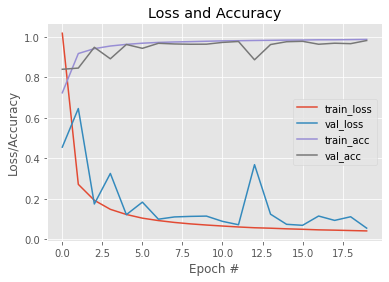

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## With the help of LeNet Architecture we are able to get very good (~98%) accuracy with generalized model.